[**Paper**](https://arxiv.org/ftp/arxiv/papers/2204/2204.06806.pdf): YOLO-Pose: Enhancing YOLO for Multi Person Pose Estimation Using Object Keypoint Similarity Loss

[*git*](https://github.com/WongKinYiu/yolov7/tree/pose)

## Import libraries

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import cv2
import numpy as np
import time

from torchvision import transforms

from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.cuda.empty_cache()

In [8]:
from platform import python_version
torch.__version__, cv2.__version__, python_version()

('1.12.1', '4.6.0', '3.9.13')

## Pose prerequisites

Download the pre-trained pose estimation model from YOLOv7 official release

wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt

In [9]:
# load model from pre-trained version
weigths = torch.load('D:\gdrive\yolov7-pose\models\yolov7-w6-pose.pt') # replace with your path
model = weigths['model']
model = model.float().to(device)

## Test on image files

In [10]:
def plot_pose_estimation(model, image_path):
    
    image = cv2.imread(image_path)
    image = letterbox(image, 960, stride=64, auto=True)[0]
    image = transforms.ToTensor()(image)
    image = torch.tensor(np.array([image.numpy()]))
    image = image.to(device)
    
    # set evaluation mode
    _ = model.eval()
    output, _ = model(image)
    
    output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
    with torch.no_grad():
        output = output_to_keypoint(output)
    nimg = image[0].permute(1, 2, 0) * 255
    nimg = nimg.cpu().numpy().astype(np.uint8)
    nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
    for idx in range(output.shape[0]):
        plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
        
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(nimg)
    plt.show()

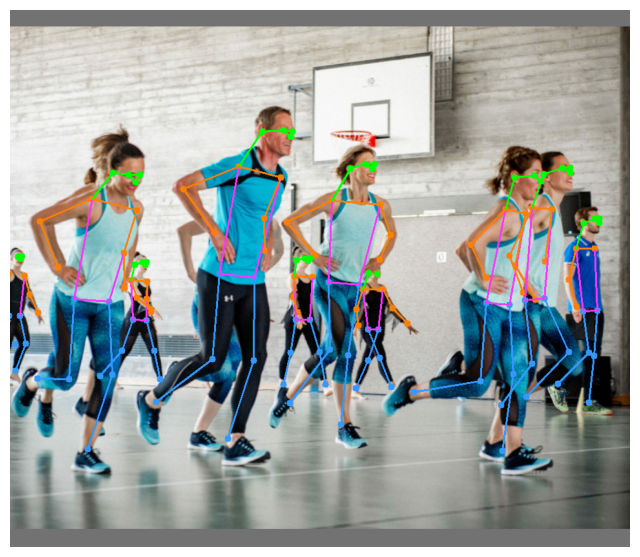

In [11]:
plot_pose_estimation(model, 'yolov7/images/team1.jpg')

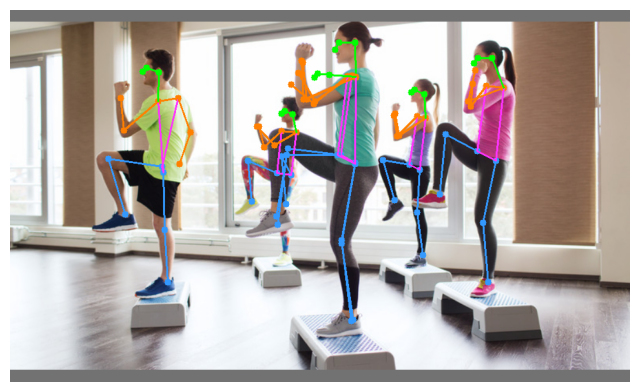

In [12]:
plot_pose_estimation(model, 'yolov7/images/team2.jpg')

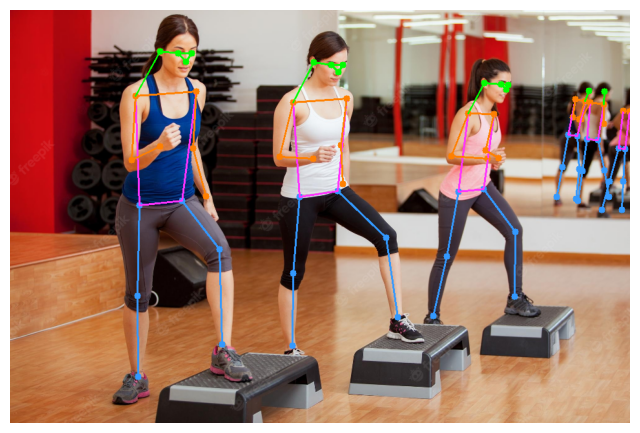

In [13]:
plot_pose_estimation(model, 'yolov7/images/team3.jpg')

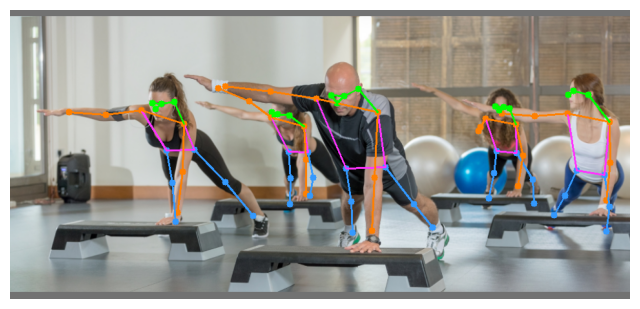

In [14]:
plot_pose_estimation(model, 'yolov7/images/aerobic-stepper.png')

## Test on video files